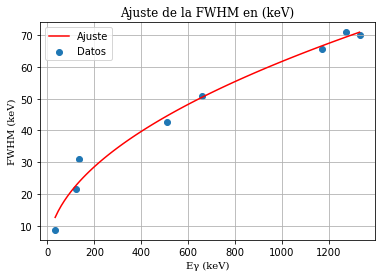

c0 = 1.7492066430000675 ± 2.806044370142628
c1 = 1.8964054980941587 ± 0.1095962694861523


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

FWHM = [8.7,21.5,31,42.6,50.9,65.7,71,70.1]  
E_gamma = [32.8,122.1,136.5,511,661.7,1173.2,1274.5,1332.5]  
def func(E_gamma, c0, c1):
    return c0 + c1 *(np.sqrt(E_gamma))

params, covariance = curve_fit(func, E_gamma, FWHM)
c0_ajustado, c1_ajustado = params
E_gamma_grafica = np.linspace(min(E_gamma), max(E_gamma), 100)
FWHM_ajustado = func(E_gamma_grafica, c0_ajustado, c1_ajustado)
covariance_matrix = covariance

c0_std_dev = np.sqrt(covariance_matrix[0, 0])
c1_std_dev = np.sqrt(covariance_matrix[1, 1])

plt.scatter(E_gamma, FWHM, label = "Datos")
plt.plot(E_gamma_grafica, FWHM_ajustado, 'r-', label = "Ajuste")
plt.title(f"Ajuste de la FWHM en (keV)", family = "serif")
plt.xlabel("Eγ (keV)", family = "serif")
plt.ylabel("FWHM (keV)", family = "serif")
plt.legend()
plt.grid(True)
plt.show()

print(f"c0 = {c0_ajustado} ± {c0_std_dev}")
print(f"c1 = {c1_ajustado} ± {c1_std_dev}")

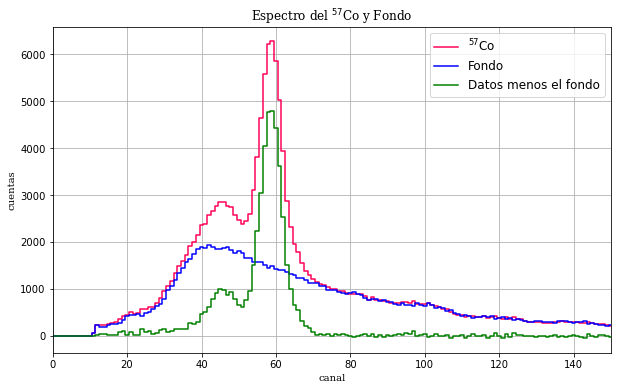

In [115]:
datos = "NaI_57Co_300s.dat"
datos_fondo = "NaI_Fondo_300s.dat"
df1 = pd.read_table(datos, sep="\s+")
df2 = pd.read_table(datos_fondo, sep="\s+")

x1 = df1["canal"]
y1 = df1["cuentas"]
x2 = df2["canal"]
y2 = df2["cuentas"]

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color = "#FF0055", drawstyle = "steps-mid", label = "$^{57}$Co")
plt.plot(x2 , y2, color = "#0000FF", drawstyle = "steps-mid", label = "Fondo")
plt.plot(x1, y1-y2, color = "green", drawstyle = "steps-mid", label = "Datos sin fondo")
plt.title("Espectro del $^{57}$Co y Fondo", family = "serif")
plt.xlabel("canal", family = "serif")
plt.ylabel("cuentas", family = "serif")
plt.xlim(0, 150)
plt.grid()
plt.legend(fontsize=12)
plt.show()


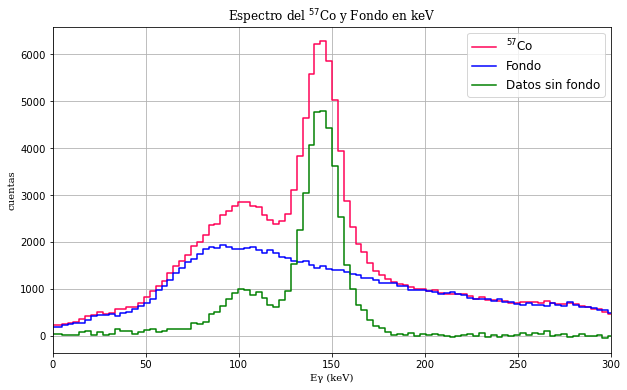

In [133]:
datos = "NaI_57Co_300s.dat"
datos_fondo = "NaI_Fondo_300s.dat"
df1 = pd.read_table(datos, sep="\s+")
df2 = pd.read_table(datos_fondo, sep="\s+")

x1 = df1["canal"]
y1 = df1["cuentas"]
x2 = df2["canal"]
y2 = df2["cuentas"]

a0 = -41
a1 = 3.16  

x_energia = a0 + a1 * x1

plt.figure(figsize=(10, 6))
plt.plot(x_energia, y1, color = "#FF0055", drawstyle = "steps-mid", label = "$^{57}$Co")
plt.plot(x_energia, y2, color = "#0000FF", drawstyle = "steps-mid", label = "Fondo")
plt.plot(x_energia, y1-y2, color = "green", drawstyle = "steps-mid", label = "Datos sin fondo")
plt.title("Espectro del $^{57}$Co y Fondo en keV", family = "serif")
plt.xlabel("Eγ (keV)", family = "serif")
plt.ylabel("cuentas", family = "serif")
plt.xlim(0, 300)
plt.grid()
plt.legend(fontsize=12)
plt.show()

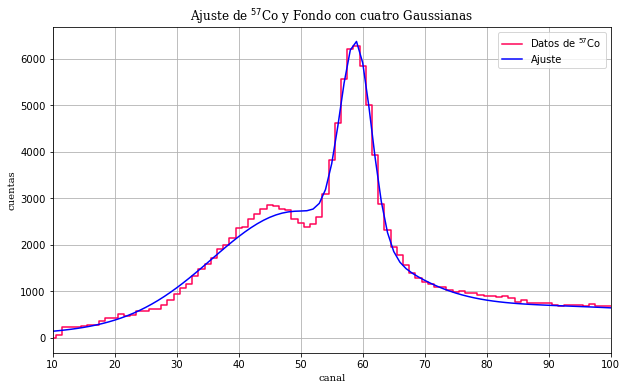

Parámetros ajustados:
M1: 692.9459666792056 ± 13.07983375078488
mu1: 85.18613020842679 ± 1.268948454506542
sigma1: 39.85545233781322 ± 0.760490721290999
M2: 2264.5405523434288 ± 26.58414818786647
mu2: 48.67059703269401 ± 0.14445929718842548
sigma2: 13.042032904135098 ± 0.16168167461735997
M3: 4162.757361911589 ± 35.50319527108603
mu3: 58.924636278667684 ± 0.02278579816619798
sigma3: 2.4993640051488417 ± 0.02681280249378412


In [124]:
def ajuste(x, M1, mu1, sigma1, M2, mu2, sigma2, M3, mu3, sigma3):
    gaussiana1 = M1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    gaussiana2 = M2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    gaussiana3 = M3 * np.exp(-(x - mu3)**2 / (2 * sigma3**2))
    return gaussiana1 + gaussiana2 + gaussiana3 

parametros_iniciales = [1000, 65, 2, 3000, 45, 2, 6000, 58, 2]
params, covariance = curve_fit(ajuste2, x1, y1, p0=parametros_iniciales)
incertidumbres = np.sqrt(np.diag(covariance))
M1, mu1, sigma1, M2, mu2, sigma2, M3, mu3, sigma3 = params

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color = "#FF0055", drawstyle = "steps-mid", label = "Datos de $^{57}$Co")
plt.plot(x1, ajuste(x1, M1, mu1, sigma1, M2, mu2, sigma2, M3, mu3, sigma3), 'b-', label = "Ajuste")
plt.title("Ajuste de $^{57}$Co y Fondo con cuatro Gaussianas", family = "serif")
plt.xlabel("canal", family = "serif")
plt.ylabel("cuentas", family = "serif")
plt.xlim(0, 1024)
plt.grid()
plt.legend()
plt.xlim(10, 100)
plt.show()

print("Parámetros ajustados:")
print(f"M1: {M1} ± {incertidumbres[0]}")
print(f"mu1: {mu1} ± {incertidumbres[1]}")
print(f"sigma1: {sigma1} ± {incertidumbres[2]}")
print(f"M2: {M2} ± {incertidumbres[3]}")
print(f"mu2: {mu2} ± {incertidumbres[4]}")
print(f"sigma2: {sigma2} ± {incertidumbres[5]}")
print(f"M3: {M3} ± {incertidumbres[6]}")
print(f"mu3: {mu3} ± {incertidumbres[7]}")
print(f"sigma3: {sigma3} ± {incertidumbres[8]}")

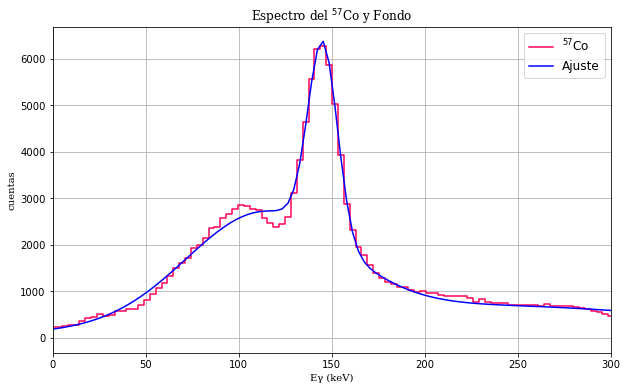

Parámetros ajustados:
A1: 2264.548716655071 ± 26.583556107424393
mu1: 112.79948394700642 ± 0.4564801083099677
sigma1: 41.213086735748846 ± 0.5109056394551322
A2: 692.9328030821354 ± 13.079268612435353
mu2: 228.19005912926923 ± 4.010050371919793
sigma2: 125.94560110973009 ± 2.403292143763418
A3: 4162.745818826935 ± 35.50298177097549
mu3: 145.20183962874864 ± 0.07200320233079184
sigma3: 7.89796460415087 ± 0.08472789690404017


In [132]:
x1 = df1["canal"]
y1 = df1["cuentas"]
x2 = df2["canal"]
y2 = df2["cuentas"]

a0 = -41
a1 = 3.16  

x_energia = a0 + a1 * x1

def ajuste(energia, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3):
    gaussiana1 = A1 * np.exp(-(energia - mu1)**2 / (2 * sigma1**2))
    gaussiana2 = A2 * np.exp(-(energia - mu2)**2 / (2 * sigma2**2))
    gaussiana3 = A3 * np.exp(-(energia - mu3)**2 / (2 * sigma3**2))
    return gaussiana1 + gaussiana2 + gaussiana3

parametros_iniciales = [1000, 100, 20, 700, 122, 22, 4800, 136, 11]

params, covariance = curve_fit(ajuste, x_energia, y1, p0=parametros_iniciales)
A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3 = params
incertidumbres = np.sqrt(np.diag(covariance))

plt.figure(figsize=(10, 6))
plt.plot(x_energia, y1 , color="#FF0055", drawstyle="steps-mid", label="$^{57}$Co")
plt.plot(x_energia, ajuste(x_energia, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3 ),'b-', label="Ajuste" )
plt.title("Espectro del $^{57}$Co y Fondo", family="serif")
plt.xlabel("Eγ (keV)", family="serif")
plt.ylabel("cuentas", family="serif")
plt.xlim(0, 300)
plt.grid()
plt.legend(fontsize=12)
plt.show()

print("Parámetros ajustados:")
print(f"A1: {A1} ± {incertidumbres[0]}")
print(f"mu1: {mu1} ± {incertidumbres[1]}")
print(f"sigma1: {sigma1} ± {incertidumbres[2]}")
print(f"A2: {A2} ± {incertidumbres[3]}")
print(f"mu2: {mu2} ± {incertidumbres[4]}")
print(f"sigma2: {sigma2} ± {incertidumbres[5]}")
print(f"A3: {A3} ± {incertidumbres[6]}")
print(f"mu3: {mu3} ± {incertidumbres[7]}")
print(f"sigma3: {sigma3} ± {incertidumbres[8]}")
